<a href="https://colab.research.google.com/github/Megha-S-K/solar-data-automation/blob/main/solar0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# run in Colab
from google.colab import files
import io, pandas as pd

uploaded = files.upload()           # select your file
fn = list(uploaded.keys())[0]
print("Uploaded file:", fn)

# Try to load as CSV; if Excel, change to read_excel
try:
    df = pd.read_csv(io.BytesIO(uploaded[fn]), low_memory=False)
except Exception as e:
    print("read_csv error:", type(e).__name__, e)
    # fallback attempts
    df = pd.read_csv(io.BytesIO(uploaded[fn]), encoding='latin1', low_memory=False)
print("Loaded shape:", df.shape)


Saving crt_solar.csv to crt_solar (3).csv
Uploaded file: crt_solar (3).csv
Loaded shape: (107328, 31)


In [3]:
df.head(7)

,date,time,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,weather_type,period,albedo,azimuth,zenith,min_air_temp,max_air_temp,SOLAR 120.990kw-I/P,SOLAR 68.88KW,57.810KW -Solar
0,20-07-2022,00:15:00,27,0,0,0,0,41.1,22.9,0,...,MOSTLY CLOUDY,PT15M,0.17,7,148,25.0,34.9,0.0,0.0,0.0
1,20-07-2022,00:30:00,27,0,0,0,0,41.1,22.9,0,...,MOSTLY CLOUDY,PT15M,0.17,1,148,25.0,34.9,0.0,0.0,0.0
2,20-07-2022,00:45:00,27,0,0,0,0,46.6,22.9,0,...,MOSTLY CLOUDY,PT15M,0.17,-6,148,26.4,34.7,0.0,0.0,0.0
3,20-07-2022,01:00:00,27,0,0,0,0,69.6,22.9,0,...,OVERCAST,PT15M,0.17,-12,147,26.4,34.7,0.0,0.0,0.0
4,20-07-2022,01:15:00,27,0,0,0,0,69.2,22.9,0,...,OVERCAST,PT15M,0.17,-19,146,26.4,34.7,0.0,0.0,0.0
5,20-07-2022,01:30:00,27,0,0,0,0,72.0,22.9,0,...,OVERCAST,PT15M,0.17,-24,145,26.4,34.7,0.0,0.0,0.0
6,20-07-2022,01:45:00,27,0,0,0,0,83.0,22.9,0,...,OVERCAST,PT15M,0.17,-29,143,26.4,34.7,0.0,0.0,0.0


In [4]:
# always keep the original copy
df_raw = df.copy(deep=True)

In [5]:
# quick reproducibility setting
RANDOM_STATE = 42

In [6]:
df.shape

(107328, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107328 entries, 0 to 107327
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 107328 non-null  object 
 1   time                 107328 non-null  object 
 2   air_temp             107328 non-null  int64  
 3   clearsky_dhi         107328 non-null  int64  
 4   clearsky_dni         107328 non-null  int64  
 5   clearsky_ghi         107328 non-null  int64  
 6   clearsky_gti         107328 non-null  int64  
 7   cloud_opacity        107328 non-null  float64
 8   dewpoint_temp        107328 non-null  float64
 9   dhi                  107328 non-null  int64  
 10  dni                  107328 non-null  int64  
 11  ghi                  107328 non-null  int64  
 12  gti                  107328 non-null  int64  
 13  precipitable_water   107328 non-null  float64
 14  precipitation_rate   107328 non-null  float64
 15  relative_humidity

In [8]:
df.describe(include='all').T
# all helps to include categorical data and T refers to transpose.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,107328,1119,10-08-2025,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,107328,96,00:15:00,1118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
air_temp,107328.0,NaN,NaN,NaN,29.323476,3.819435,20.0,27.0,29.0,32.0,42.0
clearsky_dhi,107328.0,NaN,NaN,NaN,73.339576,88.599866,0.0,0.0,2.0,144.0,416.0
clearsky_dni,107328.0,NaN,NaN,NaN,271.844346,320.800666,0.0,0.0,0.0,612.0,939.0
clearsky_ghi,107328.0,NaN,NaN,NaN,268.889097,344.59465,0.0,0.0,2.0,589.0,1037.0
clearsky_gti,107328.0,NaN,NaN,NaN,265.018662,342.75513,0.0,0.0,2.0,579.0,1083.0
cloud_opacity,107328.0,NaN,NaN,NaN,33.775947,30.33038,0.0,3.2,28.8,56.9,97.0
dewpoint_temp,107328.0,NaN,NaN,NaN,21.686457,2.299259,7.3,20.8,22.2,23.2,26.8
dhi,107328.0,NaN,NaN,NaN,106.158328,140.729975,0.0,0.0,1.0,193.0,614.0


In [9]:
# Missing & duplicates
print("Missing counts (top 30):")
display(df.isna().sum().sort_values(ascending=False).head(30))

Missing counts (top 30):


,0
date,0
time,0
air_temp,0
clearsky_dhi,0
clearsky_dni,0
clearsky_ghi,0
clearsky_gti,0
cloud_opacity,0
dewpoint_temp,0
dhi,0


In [10]:
print("Duplicates (rows):", df.duplicated().sum())

Duplicates (rows): 0


In [11]:
# Cardinality / target checks (if you know target name, set it)
# Cardinality == no. of unique values in a column
# High Cardinality is not good for one-hot encoding
print("Columns and their unique counts (top 50):")
display(df.nunique().sort_values(ascending=False).head(50))

Columns and their unique counts (top 50):


,0
SOLAR 120.990kw-I/P,2505
SOLAR 68.88KW,1475
57.810KW -Solar,1450
date,1119
clearsky_gti,1074
gti,1074
ghi,1033
clearsky_ghi,1033
cloud_opacity,957
dni,937


In [12]:
# quick sample rows (random)
# random_state is you to get random elements from the dataset.
#fixing rs as 42 helps to denote the start point so that the 8 data picked or same if the same random state is used.(Shuffle this deck of cards, but always use the same shuffle trick.)
display(df.sample(8, random_state=RANDOM_STATE))

,date,time,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,weather_type,period,albedo,azimuth,zenith,min_air_temp,max_air_temp,SOLAR 120.990kw-I/P,SOLAR 68.88KW,57.810KW -Solar
35978,29-07-2023,18:45:00,34,3,0,3,3,36.3,21.2,2,...,MOSTLY CLOUDY,PT15M,0.16,71,90,25.7,35.2,0.0,0.0,0.00
98571,11-05-2025,19:00:00,36,0,0,0,0,39.2,20.1,0,...,MOSTLY CLOUDY,PT15M,0.17,71,96,27.5,39.1,0.0,0.0,0.00
56458,28-02-2024,02:45:00,25,0,0,0,0,0.0,20.9,0,...,HAZY,PT15M,0.17,-89,149,24.1,36.5,0.0,0.0,0.00
29578,24-05-2023,02:45:00,29,0,0,0,0,34.2,23.0,0,...,PARTLY CLOUDY,PT15M,0.18,-48,133,27.8,39.2,0.0,0.0,0.00
84204,13-12-2024,03:15:00,24,0,0,0,0,70.9,23.1,0,...,RAIN,PT15M,0.16,-112,136,24.0,26.6,0.1,0.0,0.00
42378,04-10-2023,10:45:00,32,170,770,859,881,0.0,20.7,170,...,SUNNY,PT15M,0.16,-123,27,26.1,37.6,21.6,0.0,9.68
43886,20-10-2023,03:45:00,26,0,0,0,0,0.0,23.9,0,...,HAZY,PT15M,0.17,-94,127,25.7,33.9,0.1,0.0,0.01
37036,09-08-2023,19:15:00,35,0,0,0,0,90.2,20.2,0,...,OVERCAST,PT15M,0.17,72,97,26.3,38.0,0.0,0.0,0.00


In [13]:
# columns list
print("Columns:", df.columns.tolist())

Columns: ['date', 'time', 'air_temp', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi', 'clearsky_gti', 'cloud_opacity', 'dewpoint_temp', 'dhi', 'dni', 'ghi', 'gti', 'precipitable_water', 'precipitation_rate', 'relative_humidity', 'surface_pressure', 'wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m', 'weather_type', 'period', 'albedo', 'azimuth', 'zenith', 'min_air_temp', 'max_air_temp', 'SOLAR 120.990kw-I/P', 'SOLAR 68.88KW', '57.810KW -Solar']


In [14]:
df.dtypes.value_counts()

,count
float64,14
int64,13
object,4


In [15]:
# show top values for suspected categorical columns (pick a few)
for c in df.columns[:8]:   # we show first 8 columns as an example; change range if you want
    print("----", c, "-----")
    print(df[c].value_counts(dropna=False).head(7))
    # displays row value and its frequency in dataset

---- date -----
date
10-08-2025    96
09-08-2025    96
21-07-2022    96
22-07-2022    96
23-07-2022    96
24-07-2022    96
25-07-2022    96
Name: count, dtype: int64
---- time -----
time
00:15:00    1118
00:30:00    1118
00:45:00    1118
01:00:00    1118
01:15:00    1118
01:30:00    1118
01:45:00    1118
Name: count, dtype: int64
---- air_temp -----
air_temp
27    13672
28    12236
26    10574
29    10423
30     8538
25     7249
31     7018
Name: count, dtype: int64
---- clearsky_dhi -----
clearsky_dhi
0      53043
1        454
140      377
153      369
138      367
139      367
132      366
Name: count, dtype: int64
---- clearsky_dni -----
clearsky_dni
0      53723
1        426
2        220
729      153
705      151
706      148
3        144
Name: count, dtype: int64
---- clearsky_ghi -----
clearsky_ghi
0      53039
1        443
5        220
2        206
4        199
3        137
902      128
Name: count, dtype: int64
---- clearsky_gti -----
clearsky_gti
0     53054
1       448
4     

### cleaning

In [16]:
# 2.1 Clean column names (lowercase, underscores, drop special chars)
orig_columns = df.columns.tolist()
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_', regex=False)
                .str.replace(r'[^0-9a-z_]', '', regex=True))
print("Renamed columns (sample):")
print(orig_columns[:6], " -> ", df.columns[:6].tolist())

Renamed columns (sample):
['date', 'time', 'air_temp', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi']  ->  ['date', 'time', 'air_temp', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi']


In [17]:
# 2.2 Rename the 3 target columns to safe short names
# Adjust mapping if necessary (these are based on your pasted names)
mapping = {
    'solar_120990kwip': 'solar_120_99kw',   # original "SOLAR 120.990kw-I/P" becomes solar_120990kwip -> map to readable
    'solar_6888kw': 'solar_68_88kw',       # original "SOLAR 68.88KW"
    '57810kw_solar': 'solar_57_81kw'       # original "57.810KW -Solar" -> after cleaning will be like 57810kw_solar
}

In [18]:
# show what maps will happen (only keys present)
present_map = {k: v for k,v in mapping.items() if k in df.columns}
print("Will rename (present):", present_map)
df.rename(columns=present_map, inplace=True)

Will rename (present): {'solar_120990kwip': 'solar_120_99kw', 'solar_6888kw': 'solar_68_88kw', '57810kw_solar': 'solar_57_81kw'}


In [19]:
# 2.3 Combine date + time into single datetime column (dayfirst: True)
# strip whitespace first
df['date'] = df['date'].astype(str).str.strip()
df['time'] = df['time'].astype(str).str.strip()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst=True, errors='coerce')

In [20]:
# 2.4 Show how many failed to parse
n_bad_dt = df['datetime'].isna().sum()
print(f"datetime parse failures (NaT): {n_bad_dt} / {len(df)}")

datetime parse failures (NaT): 0 / 107328


In [21]:
 # 2.5 Sort & reset index by datetime (keep old index if you want)
df = df.sort_values('datetime').reset_index(drop=True)

In [22]:
# 2.6 Try to coerce object columns to numeric where appropriate
# We will convert every column not in this keep-list to numeric if possible
keep_cols = ['date', 'time', 'datetime', 'weather_type', 'period']  # keep these as such.. (as they are object datatype)
to_attempt = [c for c in df.columns if c not in keep_cols]

coercion_report = {}
for c in to_attempt:
    before_nonnull = df[c].notna().sum()
    df[c] = pd.to_numeric(df[c], errors='coerce')  # coerce non-numeric -> NaN
    after_nonnull = df[c].notna().sum()
    coercion_report[c] = (before_nonnull, after_nonnull)

# print a small report of coercions (show columns where we lost values)
print("\nCoercion report (col : (non-nulls before, after)) - showing where after < before:")
for k,v in coercion_report.items():
    if v[1] < v[0]:
        print(k, v)

#convert all col except keep_cols into numeric form.



Coercion report (col : (non-nulls before, after)) - showing where after < before:


In [23]:
# 2.7 Missing % per column (sorted)
missing_pct = df.isna().mean().sort_values(ascending=False)
print("\nTop 30 columns by missing %:")
print((missing_pct.head(30)*100).round(3))


Top 30 columns by missing %:
date                   0.0
time                   0.0
air_temp               0.0
clearsky_dhi           0.0
clearsky_dni           0.0
clearsky_ghi           0.0
clearsky_gti           0.0
cloud_opacity          0.0
dewpoint_temp          0.0
dhi                    0.0
dni                    0.0
ghi                    0.0
gti                    0.0
precipitable_water     0.0
precipitation_rate     0.0
relative_humidity      0.0
surface_pressure       0.0
wind_direction_100m    0.0
wind_direction_10m     0.0
wind_speed_100m        0.0
wind_speed_10m         0.0
weather_type           0.0
period                 0.0
albedo                 0.0
azimuth                0.0
zenith                 0.0
min_air_temp           0.0
max_air_temp           0.0
solar_120_99kw         0.0
solar_68_88kw          0.0
dtype: float64


In [24]:
# 2.8 Check duplicated datetimes
dup_dt = df['datetime'].duplicated().sum()
print(f"\nDuplicated datetime rows: {dup_dt}")


Duplicated datetime rows: 0


In [25]:
# 2.9 If datetime has no NaT and duplicates are zero, optionally set as index
if n_bad_dt == 0:
    df.set_index('datetime', inplace=True)
    # infer frequency (may return None if irregular)
    inferred_freq = pd.infer_freq(df.index[:500])  # check first chunk
    print("Inferred frequency (first 500 records):", inferred_freq)
else:
    print("Datetime parsing had failures; review rows with NaT (see sample below):")
    display(df[df['datetime'].isna()].head(10))

#checks if data is evenly spaced

Inferred frequency (first 500 records): 15min


In [26]:
df.dtypes.value_counts()

,count
float64,14
int64,13
object,4


In [27]:

df.head(8)

,date,time,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,weather_type,period,albedo,azimuth,zenith,min_air_temp,max_air_temp,solar_120_99kw,solar_68_88kw,solar_57_81kw
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-20 00:15:00,20-07-2022,00:15:00,27,0,0,0,0,41.1,22.9,0,...,MOSTLY CLOUDY,PT15M,0.17,7,148,25.0,34.9,0.0,0.0,0.0
2022-07-20 00:30:00,20-07-2022,00:30:00,27,0,0,0,0,41.1,22.9,0,...,MOSTLY CLOUDY,PT15M,0.17,1,148,25.0,34.9,0.0,0.0,0.0
2022-07-20 00:45:00,20-07-2022,00:45:00,27,0,0,0,0,46.6,22.9,0,...,MOSTLY CLOUDY,PT15M,0.17,-6,148,26.4,34.7,0.0,0.0,0.0
2022-07-20 01:00:00,20-07-2022,01:00:00,27,0,0,0,0,69.6,22.9,0,...,OVERCAST,PT15M,0.17,-12,147,26.4,34.7,0.0,0.0,0.0
2022-07-20 01:15:00,20-07-2022,01:15:00,27,0,0,0,0,69.2,22.9,0,...,OVERCAST,PT15M,0.17,-19,146,26.4,34.7,0.0,0.0,0.0
2022-07-20 01:30:00,20-07-2022,01:30:00,27,0,0,0,0,72.0,22.9,0,...,OVERCAST,PT15M,0.17,-24,145,26.4,34.7,0.0,0.0,0.0
2022-07-20 01:45:00,20-07-2022,01:45:00,27,0,0,0,0,83.0,22.9,0,...,OVERCAST,PT15M,0.17,-29,143,26.4,34.7,0.0,0.0,0.0
2022-07-20 02:00:00,20-07-2022,02:00:00,27,0,0,0,0,87.3,23.0,0,...,OVERCAST,PT15M,0.17,-34,141,26.4,34.7,0.0,0.0,0.0


## Exploration

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#summary
df.describe(include='number').iloc[:,:10].round(2)

,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,ghi
count,107328.00,107328.00,107328.00,107328.00,107328.00,107328.00,107328.00,107328.00,107328.00,107328.00
mean,29.32,73.34,271.84,268.89,265.02,33.78,21.69,106.16,155.20,222.44
std,3.82,88.60,320.80,344.59,342.76,30.33,2.30,140.73,257.07,303.68
min,20.00,0.00,0.00,0.00,0.00,0.00,7.30,0.00,0.00,0.00
25%,27.00,0.00,0.00,0.00,0.00,3.20,20.80,0.00,0.00,0.00
50%,29.00,2.00,0.00,2.00,2.00,28.80,22.20,1.00,0.00,1.00
75%,32.00,144.00,612.00,589.00,579.00,56.90,23.20,193.00,262.00,440.00
max,42.00,416.00,939.00,1037.00,1083.00,97.00,26.80,614.00,939.00,1037.00


In [30]:
# check negative
targets = ['solar_120_99kw', 'solar_68_88kw', 'solar_57_81kw']
for t in targets:
    neg_count = (df[t] < 0).sum()
    print(f"{t}: {neg_count} negative values")


solar_120_99kw: 0 negative values
solar_68_88kw: 0 negative values
solar_57_81kw: 0 negative values


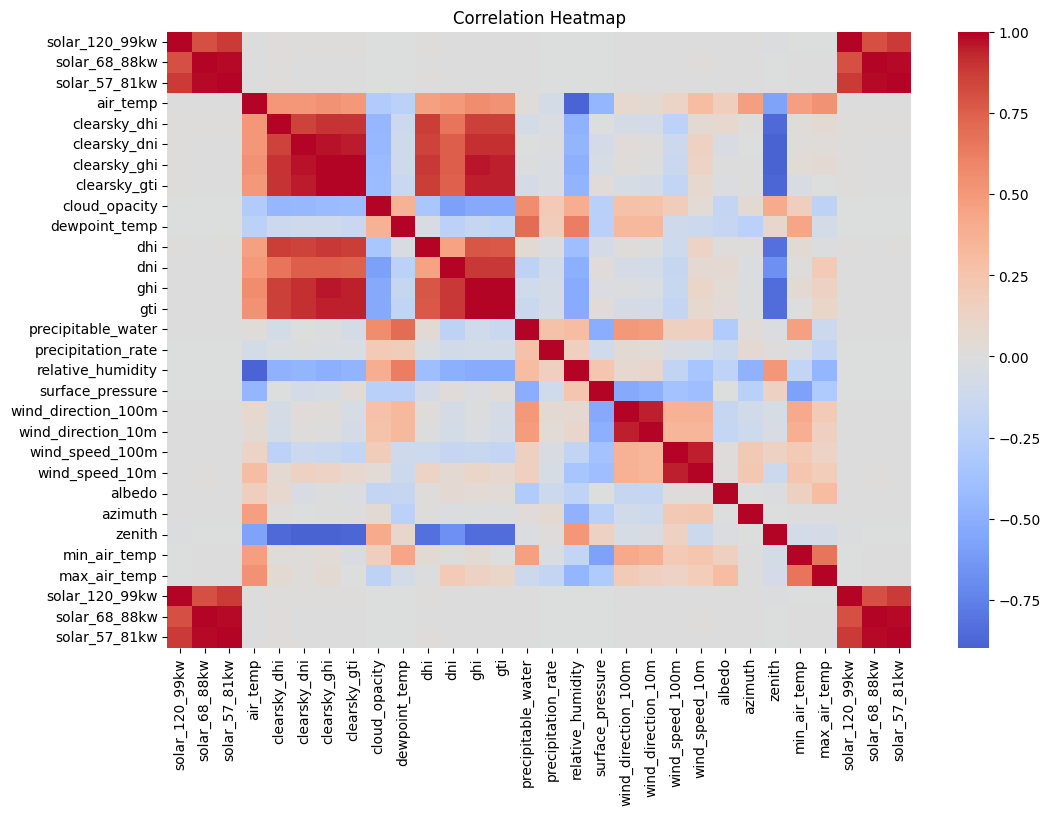

In [31]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[targets + df.select_dtypes('number').columns.tolist()].corr(),
            cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
df['weather_type'].value_counts()

,count
weather_type,
PARTLY CLOUDY,27183
HAZY,22474
OVERCAST,18030
MOSTLY CLOUDY,17042
RAIN,7699
SUNNY,6043
MOSTLY SUNNY,3050
INTERMITTENT RAIN,1933
CLEAR,1605


trail

In [ ]:
# one-hot encode that column
df_encoded = pd.get_dummies(df, columns=['weather_type'], drop_first=False)

print(df_encoded.shape)  # will have 14 extra columns
df.select_dtypes(include='object').columns

(107328, 44)


Index(['date', 'time', 'weather_type', 'period'], dtype='object')

In [ ]:
df_encoded.columns.tolist()

['date',
 'time',
 'air_temp',
 'clearsky_dhi',
 'clearsky_dni',
 'clearsky_ghi',
 'clearsky_gti',
 'cloud_opacity',
 'dewpoint_temp',
 'dhi',
 'dni',
 'ghi',
 'gti',
 'precipitable_water',
 'precipitation_rate',
 'relative_humidity',
 'surface_pressure',
 'wind_direction_100m',
 'wind_direction_10m',
 'wind_speed_100m',
 'wind_speed_10m',
 'period',
 'albedo',
 'azimuth',
 'zenith',
 'min_air_temp',
 'max_air_temp',
 'solar_120_99kw',
 'solar_68_88kw',
 'solar_57_81kw',
 'weather_type_CLEAR',
 'weather_type_DRIZZLE',
 'weather_type_FOG',
 'weather_type_HAZY',
 'weather_type_INTERMITTENT RAIN',
 'weather_type_MOSTLY CLEAR',
 'weather_type_MOSTLY CLOUDY',
 'weather_type_MOSTLY SUNNY',
 'weather_type_OVERCAST',
 'weather_type_PARTLY CLOUDY',
 'weather_type_RAIN',
 'weather_type_SUNNY',
 'weather_type_THUNDERSTORM',
 'weather_type_WINDY']

In [ ]:
df_encoded.head()

,date,time,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,weather_type_INTERMITTENT RAIN,weather_type_MOSTLY CLEAR,weather_type_MOSTLY CLOUDY,weather_type_MOSTLY SUNNY,weather_type_OVERCAST,weather_type_PARTLY CLOUDY,weather_type_RAIN,weather_type_SUNNY,weather_type_THUNDERSTORM,weather_type_WINDY
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-20 00:15:00,20-07-2022,00:15:00,27,0,0,0,0,41.1,22.9,0,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:30:00,20-07-2022,00:30:00,27,0,0,0,0,41.1,22.9,0,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:45:00,20-07-2022,00:45:00,27,0,0,0,0,46.6,22.9,0,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 01:00:00,20-07-2022,01:00:00,27,0,0,0,0,69.6,22.9,0,...,False,False,False,False,True,False,False,False,False,False
2022-07-20 01:15:00,20-07-2022,01:15:00,27,0,0,0,0,69.2,22.9,0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
df_encoded.dtypes.value_counts()

,count
bool,14
float64,14
int64,13
object,3


In [ ]:
# compute correlation matrix

target = 'solar_120_99kw'
corr_matrix = df_encoded.select_dtypes(include = ['number','bool']).corr()

# get only correlations with the target
target_corr = corr_matrix[target].sort_values(ascending=False)

print(target_corr)

solar_120_99kw                    1.000000
solar_57_81kw                     0.877598
solar_68_88kw                     0.801198
clearsky_dhi                      0.011656
dhi                               0.010649
clearsky_ghi                      0.009178
clearsky_gti                      0.008832
clearsky_dni                      0.008267
ghi                               0.007159
gti                               0.006983
wind_speed_10m                    0.005988
air_temp                          0.005573
weather_type_MOSTLY SUNNY         0.004719
weather_type_MOSTLY CLOUDY        0.003579
precipitable_water                0.003301
wind_speed_100m                   0.002532
dni                               0.002476
wind_direction_100m               0.002337
azimuth                           0.002278
wind_direction_10m                0.002192
albedo                            0.001820
weather_type_PARTLY CLOUDY        0.001697
weather_type_WINDY               -0.000041
weather_typ

In [ ]:
df_encoded.select_dtypes(include='object').columns

Index(['date', 'time', 'period'], dtype='object')

# Feature Engineering

In [33]:
# 4.1 Datetime-based features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

In [34]:
# 4.2 Simplify weather_type
rare_weather = ['FOG', 'WINDY', 'DRIZZLE', 'MOSTLY CLEAR']
df['weather_type_clean'] = df['weather_type'].replace(rare_weather, 'OTHER')

In [35]:
# One-hot encode
df = pd.get_dummies(df, columns=['weather_type_clean'], drop_first=True)

In [36]:
# 4.3 Drop unnecessary columns
df = df.drop(columns=['date','time','period','weather_type'])

In [37]:
df.head()

,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,ghi,...,weather_type_clean_HAZY,weather_type_clean_INTERMITTENT RAIN,weather_type_clean_MOSTLY CLOUDY,weather_type_clean_MOSTLY SUNNY,weather_type_clean_OTHER,weather_type_clean_OVERCAST,weather_type_clean_PARTLY CLOUDY,weather_type_clean_RAIN,weather_type_clean_SUNNY,weather_type_clean_THUNDERSTORM
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-20 00:15:00,27,0,0,0,0,41.1,22.9,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:30:00,27,0,0,0,0,41.1,22.9,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:45:00,27,0,0,0,0,46.6,22.9,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 01:00:00,27,0,0,0,0,69.6,22.9,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2022-07-20 01:15:00,27,0,0,0,0,69.2,22.9,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [38]:
# Define targets
targets = ['solar_120_99kw', 'solar_68_88kw', 'solar_57_81kw']

# Correlation check only on feature columns
corr_matrix = df.drop(columns=targets).corr().abs()

# Select upper triangle
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features to drop (threshold 0.95)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Dropping due to high correlation:", to_drop)

# Drop only from features, not targets
df_cleaned = df.drop(columns=to_drop)


Dropping due to high correlation: ['clearsky_ghi', 'clearsky_gti', 'ghi', 'gti']


In [38]:
#NOT DEFINED TARGET DONT RUN
# Correlation matrix (numeric only)
corr_matrix = df.corr()

# Drop one of each highly correlated pair (threshold 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]

print("Dropping due to high correlation:", to_drop)

df = df.drop(columns=to_drop, errors='ignore')


Dropping due to high correlation: ['clearsky_ghi', 'clearsky_gti', 'ghi', 'gti', 'wind_direction_10m', 'wind_speed_10m', 'solar_57_81kw']


In [39]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features for scaling
numeric_cols = df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("✅ Scaling complete. All numeric features standardized.")


✅ Scaling complete. All numeric features standardized.


In [40]:
df.shape

(107328, 41)

In [41]:
df.head()

,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,ghi,...,weather_type_clean_HAZY,weather_type_clean_INTERMITTENT RAIN,weather_type_clean_MOSTLY CLOUDY,weather_type_clean_MOSTLY SUNNY,weather_type_clean_OTHER,weather_type_clean_OVERCAST,weather_type_clean_PARTLY CLOUDY,weather_type_clean_RAIN,weather_type_clean_SUNNY,weather_type_clean_THUNDERSTORM
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-20 00:15:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,0.241477,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:30:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,0.241477,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:45:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,0.422814,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 01:00:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,1.181133,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,False,False,False,True,False,False,False,False
2022-07-20 01:15:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,1.167945,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,False,False,False,True,False,False,False,False


In [42]:
df.dtypes.value_counts()

,count
float64,31
bool,10


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107328 entries, 2022-07-20 00:15:00 to 2025-08-11 00:00:00
Data columns (total 41 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   air_temp                              107328 non-null  float64
 1   clearsky_dhi                          107328 non-null  float64
 2   clearsky_dni                          107328 non-null  float64
 3   clearsky_ghi                          107328 non-null  float64
 4   clearsky_gti                          107328 non-null  float64
 5   cloud_opacity                         107328 non-null  float64
 6   dewpoint_temp                         107328 non-null  float64
 7   dhi                                   107328 non-null  float64
 8   dni                                   107328 non-null  float64
 9   ghi                                   107328 non-null  float64
 10  gti                               

In [44]:
df.head()

,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,ghi,...,weather_type_clean_HAZY,weather_type_clean_INTERMITTENT RAIN,weather_type_clean_MOSTLY CLOUDY,weather_type_clean_MOSTLY SUNNY,weather_type_clean_OTHER,weather_type_clean_OVERCAST,weather_type_clean_PARTLY CLOUDY,weather_type_clean_RAIN,weather_type_clean_SUNNY,weather_type_clean_THUNDERSTORM
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-20 00:15:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,0.241477,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:30:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,0.241477,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 00:45:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,0.422814,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,True,False,False,False,False,False,False,False
2022-07-20 01:00:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,1.181133,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,False,False,False,True,False,False,False,False
2022-07-20 01:15:00,-0.608332,-0.827766,-0.847397,-0.780309,-0.773205,1.167945,0.5278,-0.754344,-0.603731,-0.732459,...,False,False,False,False,False,True,False,False,False,False


In [45]:
df = df.between_time("06:00", "18:00")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54782 entries, 2022-07-20 06:00:00 to 2025-08-10 18:00:00
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   air_temp                              54782 non-null  float64
 1   clearsky_dhi                          54782 non-null  float64
 2   clearsky_dni                          54782 non-null  float64
 3   clearsky_ghi                          54782 non-null  float64
 4   clearsky_gti                          54782 non-null  float64
 5   cloud_opacity                         54782 non-null  float64
 6   dewpoint_temp                         54782 non-null  float64
 7   dhi                                   54782 non-null  float64
 8   dni                                   54782 non-null  float64
 9   ghi                                   54782 non-null  float64
 10  gti                                   54782 non

In [49]:
targets = ["solar_120_99kw", "solar_68_88kw", "solar_57_81kw"]

for col in targets:
    df[f"{col}_lag_1"] = df[col].shift(1)   # 15 mins before
    df[f"{col}_lag_4"] = df[col].shift(4)   # 1 hour before
    df[f"{col}_lag_96"] = df[col].shift(96) # 1 day before

In [50]:
for col in targets:
    df[f"{col}_roll_mean_4"] = df[col].rolling(4).mean()   # last 1 hour
    df[f"{col}_roll_mean_day"] = df[col].rolling(96).mean() # last day


In [51]:
df = df.dropna()

In [52]:
df.head()

,air_temp,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,ghi,...,solar_68_88kw_lag_96,solar_57_81kw_lag_1,solar_57_81kw_lag_4,solar_57_81kw_lag_96,solar_120_99kw_roll_mean_4,solar_120_99kw_roll_mean_day,solar_68_88kw_roll_mean_4,solar_68_88kw_roll_mean_day,solar_57_81kw_roll_mean_4,solar_57_81kw_roll_mean_day
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-21 17:45:00,0.700768,0.052601,0.168815,-0.313091,-0.472697,0.399735,0.658277,-0.143242,-0.603731,-0.449269,...,0.008238,-0.006746,-0.006746,-0.006746,-0.007296,-0.007774,-0.005907,-0.004717,-0.006746,-0.006746
2022-07-21 18:00:00,0.700768,-0.116700,-0.086797,-0.461092,-0.580647,0.119486,0.614785,-0.271147,-0.603731,-0.508541,...,0.008321,-0.006746,-0.006746,-0.006746,-0.007987,-0.007774,-0.005907,-0.004865,-0.006746,-0.006746
2022-07-22 06:00:00,-0.870152,-0.827766,-0.847397,-0.780309,-0.773205,1.596560,0.919232,-0.754344,-0.603731,-0.732459,...,0.008655,-0.006746,-0.006746,-0.006746,-0.008219,-0.007774,-0.005907,-0.005017,-0.006746,-0.006746
2022-07-22 06:15:00,-0.870152,-0.805192,-0.847397,-0.774505,-0.767370,1.299827,0.919232,-0.747238,-0.603731,-0.729166,...,0.008321,-0.006746,-0.006746,-0.006746,-0.008221,-0.007771,-0.005907,-0.005165,-0.006746,-0.006746
2022-07-22 06:30:00,-0.870152,-0.590744,-0.744529,-0.710662,-0.714854,0.844835,0.919232,-0.690392,-0.603731,-0.702823,...,0.007654,-0.006746,-0.006746,-0.006746,-0.008132,-0.007767,-0.005907,-0.005306,-0.006746,-0.006746


In [53]:
# Save DataFrame as CSV
df.to_csv("analysed_data.csv", index=False)

# Download to local system
from google.colab import files
files.download("analysed_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>